NIM : <br>
nama : <br>
kelas :

# import library

In [92]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler




# load dataset

In [93]:
# load dataset uts
df = pd.read_csv("data_customer.csv")
df.head()

,Gender,Age,Income,Tenure,ServiceCalls,InternetService,PaymentMethod,LoyaltyStatus
0,Male,57,43360,8,4,DSL,Electronic check,Churn
1,Male,65,28255,11,2,Fiber optic,Credit card,Loyal
2,Male,69,88235,2,9,DSL,Mailed check,Loyal
3,Female,47,107464,9,3,DSL,Credit card,Loyal
4,Female,79,68169,6,11,No,Mailed check,Loyal


# exploratory data analysis

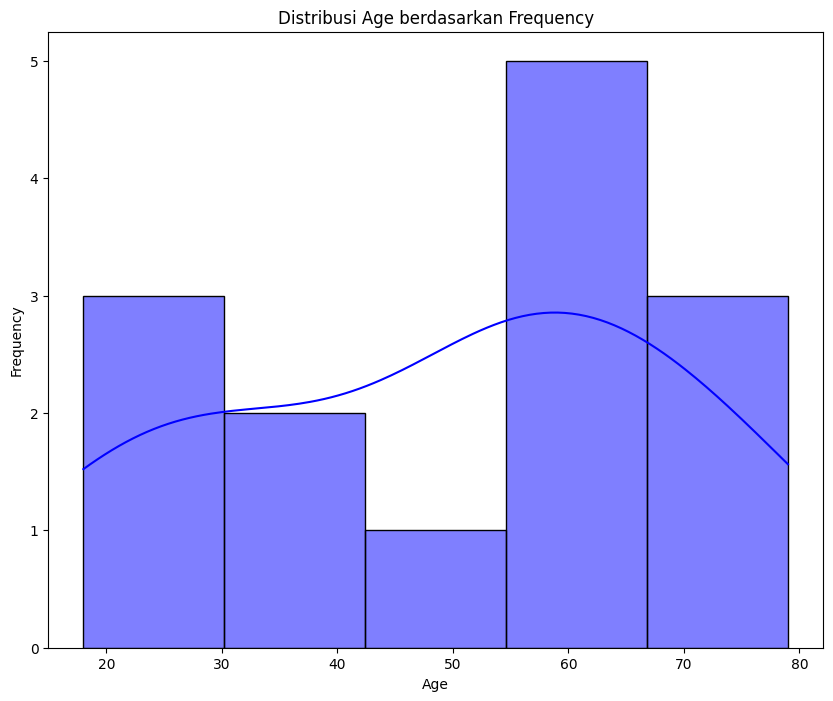

In [94]:
# eda varian 1
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribusi Age berdasarkan Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


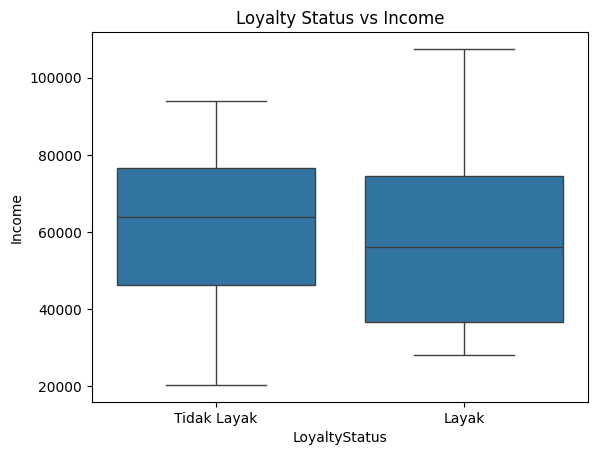

In [95]:
# eda varian 2
sns.boxplot(x='LoyaltyStatus', y='Income', data=df)
plt.title('Loyalty Status vs Income')
plt.xlabel('LoyaltyStatus')
plt.ylabel('Income')
plt.xticks(ticks=[0,1], labels=['Tidak Layak', 'Layak'])
plt.show()


C:\Users\Yogi\AppData\Local\Temp\ipykernel_16904\1278744920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=df, palette='Set2')


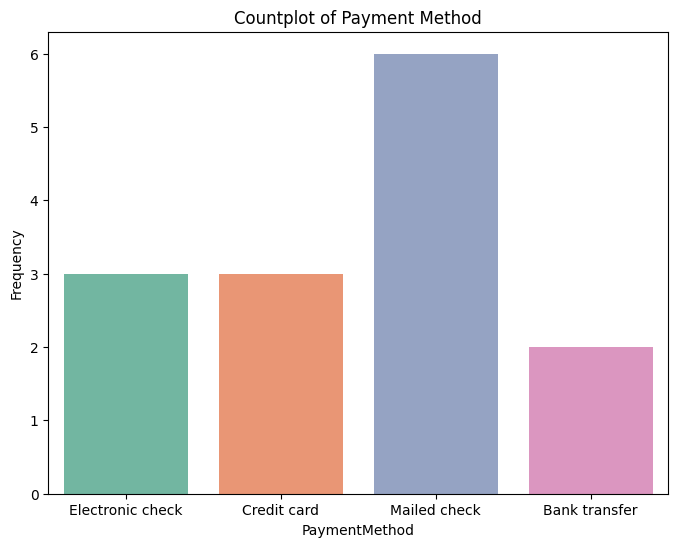

In [96]:
# eda varian 3
plt.figure(figsize=(8,6))
sns.countplot(x='PaymentMethod', data=df, palette='Set2')
plt.title('Countplot of Payment Method')
plt.ylabel('Frequency')
plt.show()


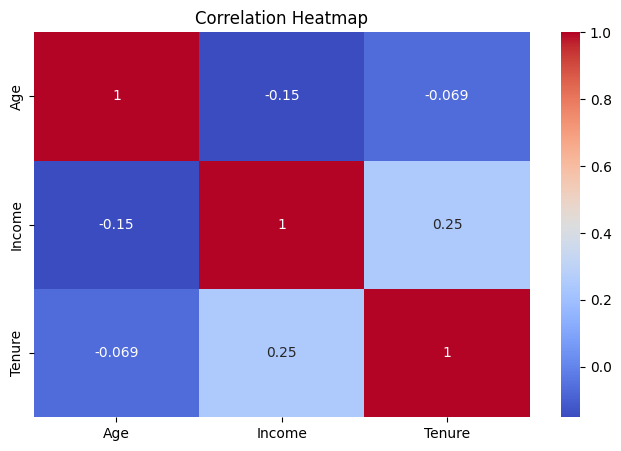

In [97]:
# eda varian 4
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age', 'Income', 'Tenure']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



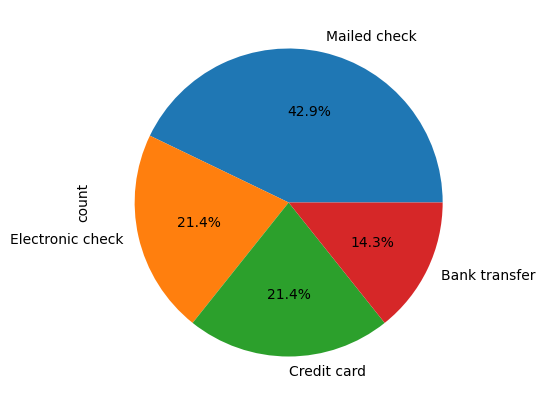

In [98]:
# eda varian 5
plt.figure(figsize=(8,5))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()



# data preprocessing

In [99]:
df = df.drop(columns=['ServiceCalls'])
df = df.drop(columns=['InternetService'])

In [100]:

label_encoder_gender = LabelEncoder()
label_encoder_payment_method = LabelEncoder()
label_encoder_loyaltystatus = LabelEncoder()

In [101]:
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['PaymentMethod'] = label_encoder_payment_method.fit_transform(df['PaymentMethod'])
df['LoyaltyStatus'] = label_encoder_payment_method.fit_transform(df['LoyaltyStatus'])

In [102]:
df.to_csv('knn_model2.csv', index=False)

In [103]:
# Splitting the dataset into features and labels
X = df.drop(columns=['LoyaltyStatus'])
y = df['LoyaltyStatus']

In [104]:
df.head()

,Gender,Age,Income,Tenure,PaymentMethod,LoyaltyStatus
0,1,57,43360,8,2,0
1,1,65,28255,11,1,1
2,1,69,88235,2,3,1
3,0,47,107464,9,1,1
4,0,79,68169,6,3,1


In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [106]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
df['LoyaltyStatus'].value_counts()

LoyaltyStatus
1    8
0    6
Name: count, dtype: int64

# modeling

In [107]:
# Creating and Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
# Predicting the test data
y_pred = knn_model.predict(X_test)

In [109]:
df.head()

,Gender,Age,Income,Tenure,PaymentMethod,LoyaltyStatus
0,1,57,43360,8,2,0
1,1,65,28255,11,1,1
2,1,69,88235,2,3,1
3,0,47,107464,9,1,1
4,0,79,68169,6,3,1


# simulasi

In [110]:
#Gender,Age,income,tenure,paymentmethod,loyalty
new_data = np.array([[1,30,100,1,0]])
new_pred = knn_model.predict(new_data)

In [111]:
# Mendapatkan probabilitas untuk setiap kelas
probabilities = knn_model.predict_proba(X)

# Misalkan kita ingin melihat probabilitas untuk contoh pertama
print(probabilities[0])  # Ini akan menunjukkan probabilitas untuk setiap kelas


[0.33333333 0.66666667]


c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [112]:
print('Hasil Prediksi', new_pred)

Hasil Prediksi [1]


In [113]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3333333333333333

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriks Kebingungan:\n', conf_matrix)

Matriks Kebingungan:
 [[0 2]
 [0 1]]


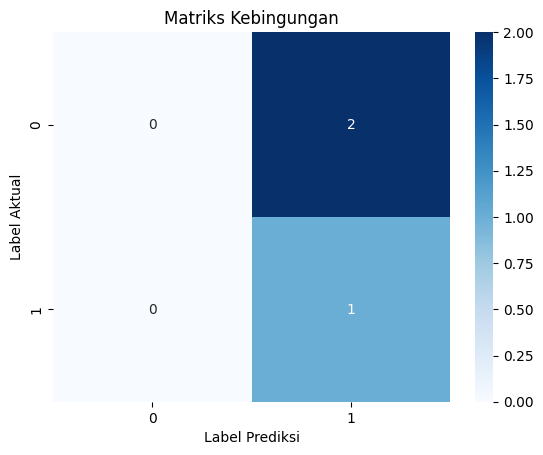

In [116]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Label Aktual')
plt.xlabel('Label Prediksi')
plt.title('Matriks Kebingungan')
plt.show()